In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('student-por.csv',delimiter=";")

In [4]:
df['G'] = df.apply(lambda row: (row["G1"] + row["G2"] + row["G3"])/3, axis=1)
df['G'] = df['G'].astype('int64')

In [5]:
df_amended = df

for i in df_amended.columns:
    if df_amended.dtypes[i] == 'object':
        new_value = 0
        for i2 in df_amended[i].unique():            
            df_amended[i] = df_amended[i].replace({i2:new_value})
            new_value += 1
    else:
        pass

/var/folders/j6/4jq4sj8s6yb1qwrn76x2g6q00000gp/T/ipykernel_5137/3954079348.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_amended[i] = df_amended[i].replace({i2:new_value})
/var/folders/j6/4jq4sj8s6yb1qwrn76x2g6q00000gp/T/ipykernel_5137/3954079348.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_amended[i] = df_amended[i].replace({i2:new_value})
/var/folders/j6/4jq4sj8s6yb1qwrn76x2g6q00000gp/T/ipykernel_5137/3954079348.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

In [17]:
df_test = df_amended.drop(['G1', 'G2', 'G3'], axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G
school,1.000000,-0.083050,0.087170,0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,0.145053,...,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292738
sex,-0.083050,1.000000,-0.043662,-0.025503,0.098205,0.064700,0.119127,0.083913,0.149635,-0.034343,...,0.065911,-0.110144,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.122302
age,0.087170,-0.043662,1.000000,0.025848,-0.002470,-0.005631,-0.107832,-0.121050,-0.071770,0.004308,...,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.133110
address,0.354520,-0.025503,0.025848,1.000000,-0.046113,0.094635,-0.190320,-0.141493,-0.159761,-0.048937,...,-0.175794,0.030939,0.033897,0.036647,-0.015475,0.047304,0.012416,-0.003787,-0.073653,-0.164106
famsize,0.022252,0.098205,-0.002470,-0.046113,1.000000,-0.239608,-0.014325,-0.039538,0.019600,0.049281,...,0.013357,-0.032936,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.039716
Pstatus,0.028120,0.064700,-0.005631,0.094635,-0.239608,1.000000,-0.057174,-0.031856,-0.028874,0.036623,...,0.059754,-0.053828,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,0.016266
Medu,-0.254787,0.119127,-0.107832,-0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,-0.087265,...,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.261284
Fedu,-0.209806,0.083913,-0.121050,-0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,-0.069979,...,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.224041
Mjob,-0.206829,0.149635,-0.071770,-0.159761,0.019600,-0.028874,0.459337,0.290703,1.000000,-0.105639,...,0.260658,-0.074286,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.166207
Fjob,0.145053,-0.034343,0.004308,-0.048937,0.049281,0.036623,-0.087265,-0.069979,-0.105639,1.000000,...,-0.061394,-0.009659,-0.026763,-0.009960,-0.005233,0.019826,0.018699,-0.040008,0.013190,-0.098141


In [20]:
filename = 'data_corr.xlsx'
df_corr = df_test.corr()
df_corr.to_excel(filename)

In [42]:
X = df_amended[['school']]
y = df_amended['G']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train)
print(y_train)

     school
421       0
469       1
607       1
497       1
470       1
..      ...
173       0
34        0
592       1
370       0
80        0

[519 rows x 1 columns]
421     9
469    12
607    11
497    10
470    12
       ..
173     9
34     12
592    12
370     8
80     11
Name: G, Length: 519, dtype: int64


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f'Equation line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

Equation line: y = -1.91x + 11.90


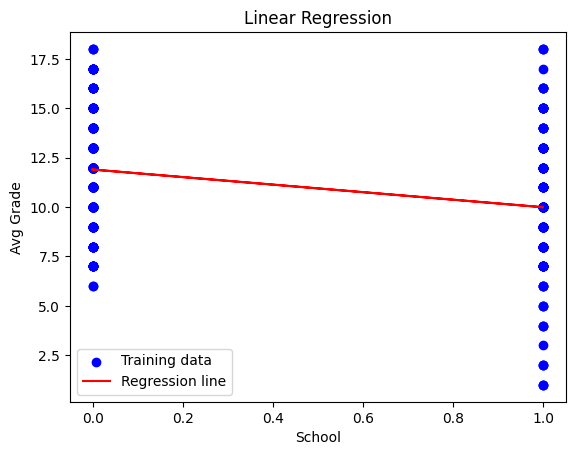

In [47]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.xlabel('School')
plt.ylabel('Avg Grade')
plt.title('Linear Regression')
plt.legend()
plt.show()